<a href="https://colab.research.google.com/github/Almuzhidul/PSDS_Kelas_Mahir/blob/main/CNN_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
from glob import glob

In [3]:
train_path = '/content/gdrive/MyDrive/Referensi Skripsi/Dataset/Train'
test_path = '/content/gdrive/MyDrive/Referensi Skripsi/Dataset/Test'

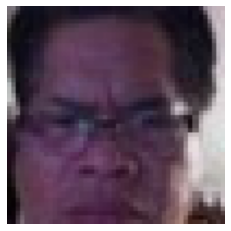

In [5]:
img = load_img(test_path + "/angry_test/13972Exp0mad_asian_124.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

In [6]:
images = ['Marah', 'Netral']

In [7]:
x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [8]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

2


In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3),))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class))#output
model.add(Activation("softmax"))

In [10]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 activation (Activation)     (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                    

In [12]:
batch_size = 40

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=x.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 1700 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [23]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 200 // batch_size,
                   epochs = 100,
                   validation_data = test_generator,
                   validation_steps = 10 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
5/5 [==============================] - 4s 795ms/step - loss: 0.5429 - accuracy: 0.7050
Epoch 2/100
5/5 [==============================] - 4s 772ms/step - loss: 0.6529 - accuracy: 0.7050
Epoch 3/100
5/5 [==============================] - 5s 905ms/step - loss: 0.5049 - accuracy: 0.7550
Epoch 4/100
5/5 [==============================] - 4s 744ms/step - loss: 0.4824 - accuracy: 0.8000
Epoch 5/100
5/5 [==============================] - 4s 753ms/step - loss: 0.4384 - accuracy: 0.7850
Epoch 6/100
5/5 [==============================] - 4s 758ms/step - loss: 0.5099 - accuracy: 0.7750
Epoch 7/100
5/5 [==============================] - 4s 749ms/step - loss: 0.5183 - accuracy: 0.7350
Epoch 8/100
5/5 [==============================] - 4s 775ms/step - loss: 0.4285 - accuracy: 0.8100
Epoch 9/100
5/5 [==============================] - 4s 757ms/step - loss: 0.5254 - accuracy: 0.7450
Epoch 10/100
5/5 [==============================] - 4s 746ms/step - loss: 0.4625 - accuracy: 0.7900
Epoch 11/

In [24]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


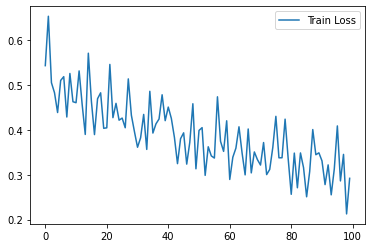

In [25]:
plt.plot(hist.history["loss"], label = "Train Loss")
#plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

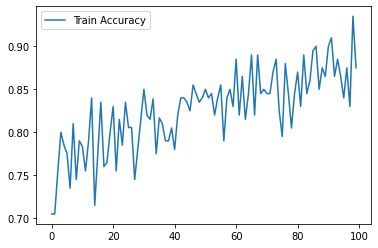

In [26]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
#plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()